In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import sys
import localSettings as ls
import math
print(ls.main_path)
import load_data_run123
import plotter_alex
import importlib
importlib.reload(plotter_alex)
import uproot
import matplotlib.pylab as pylab
import numpy as np
import math
from sklearn.model_selection import train_test_split
import pickle
import xgboost as xgb
import nue_booster 
importlib.reload(nue_booster)
import awkward
from matplotlib import gridspec
from collections import defaultdict

/home/alex/NuMI/PELEE/


In [2]:
ending = "Sept19"

##  Energy

## Closure Tests

## Blockwise Unfolding

In [6]:

with open('../blockwise/stv-analysis-new/blockwise_unsmeared_events_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
events = content[0:]
    
for i in range(20):
    events[i]=events[i].rstrip().rstrip(',')
    events[i] = float(events[i])
    
print("Unsmeared events")
print(events)
print("")

#------------------------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_AC_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
AC = content[0:]
    
for i in range(400):
    AC[i]=AC[i].rstrip().rstrip(',')
    AC[i] = float(AC[i])
    

chunks = [AC[x:x+20] for x in range(0, len(AC), 20)]

print("AC")
print(chunks)
print("")
#---------------------------------------------------------------

with open('nue_full_500_catsel_nopions_recoE_usingSelection_prior_true_signal_blockwise_recoCut_comb_'+ending+'.csv') as file:
    content = file.readlines()
prior_true = content[0:]
    
for i in range(20):
    prior_true[i]=prior_true[i].rstrip().rstrip(',')
    prior_true[i] = float(prior_true[i])
    
print("Prior Truth: ")
print(prior_true)
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_errors_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
errs = content[0:]
    
for i in range(20):
    errs[i]=errs[i].rstrip().rstrip(',')
    errs[i] = float(errs[i])
    
print("Errors: ")
print(errs)
print("")
print("################################################################")
print("")

#----------------------------------------------------------------
with open('../blockwise/stv-analysis-new/blockwise_unsmeared_cov_matrix_energy_MC_ONLY_weighted_recoCut_incErr_'+ending+'.csv') as file:
    content = file.readlines()
cov = content[0:]
    
for i in range(400):
    cov[i]=cov[i].rstrip().rstrip(',')
    cov[i] = float(cov[i])
    

chunks_cov = [cov[x:x+20] for x in range(0, len(cov), 20)]

print("cov")
print(chunks_cov)
print("")


Unsmeared events
[0.0, 1.87722e-13, 139.283, 352.949, 172.202, 71.6725, 26.8757, 31.9906, 10.8584, 4.76021, 0.0, -5.49624e-13, 2212.08, 1895.67, 453.651, 122.809, 87.1743, -9.73774e-18, 86.6849, 163.136]

AC
[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 8.95889e-31, -1.10244e-16, 6.25011e-16, -9.22093e-17, 1.21259e-16, -2.38242e-16, -5.52525e-18, 4.00458e-17, -1.36674e-16, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -1.10244e-16, 0.320673, 0.131486, 0.128428, 0.015334, 0.0792231, -0.091067, 0.0292221, 0.00111077, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 6.25011e-16, 0.131486, 0.758575, 0.183049, 0.15967, -0.0340986, 0.0668237, 0.0242003, 0.00252913, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, -9.22093e-17, 0.128428, 0.183049, 0.414096, -0.0243304, 0.00102773, 0.0529889, 0.0112504, 0.000369118, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.0, 1.21259e-16, 0.015334, 0.15967, -

In [7]:
with open('../blockwise/stv-analysis-new/blocks.txt') as file:
    content = file.readlines()
blocks = content[0:]

print(blocks)

['20\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  0\n', '9  0\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n', '16 1\n', '17 1\n', '18 1\n', '19 1\n', '20\n', '0  0\n', '1  0\n', '2  0\n', '3  0\n', '4  0\n', '5  0\n', '6  0\n', '7  0\n', '8  0\n', '9  0\n', '10 1\n', '11 1\n', '12 1\n', '13 1\n', '14 1\n', '15 1\n', '16 1\n', '17 1\n', '18 1\n', '19 1\n']


In [8]:

made_data_sig = np.dot(prior_true, chunks)
print("Prior_Truth x AC: ")
print(made_data_sig)
print("")
print("")
print("Unfolding Done with MC Data Signal: ")
print(events)
print("")

diff = made_data_sig - events
print("")
print("Difference")
print(diff)

#for i in made_data_sig:
#    print(i)

print("")
diffasfrac = np.nan_to_num(diff/made_data_sig)
print(diffasfrac*100)

Prior_Truth x AC: 
[ 0.00000000e+00  1.87724014e-13  1.39284189e+02  3.52951915e+02
  1.72204081e+02  7.16730872e+01  2.68749866e+01  3.19905715e+01
  1.08587381e+01  4.76040429e+00  0.00000000e+00 -5.49625276e-13
  2.21208085e+03  1.89566654e+03  4.53651810e+02  1.22808862e+02
  8.71741732e+01 -9.73775398e-18  8.66849976e+01  1.63135889e+02]


Unfolding Done with MC Data Signal: 
[0.0, 1.87722e-13, 139.283, 352.949, 172.202, 71.6725, 26.8757, 31.9906, 10.8584, 4.76021, 0.0, -5.49624e-13, 2212.08, 1895.67, 453.651, 122.809, 87.1743, -9.73774e-18, 86.6849, 163.136]


Difference
[ 0.00000000e+00  2.01398832e-18  1.18864984e-03  2.91533130e-03
  2.08071219e-03  5.87154362e-04 -7.13382950e-04 -2.85120754e-05
  3.38075223e-04  1.94294556e-04  0.00000000e+00 -1.27586184e-18
  8.50955882e-04 -3.45696327e-03  8.09970536e-04 -1.38314205e-04
 -1.26801286e-04 -1.39758164e-23  9.75666228e-05 -1.10738893e-04]

[ 0.00000000e+00  1.07284533e-03  8.53398976e-04  8.25985403e-04
  1.20828274e-03  8.1921

/tmp/ipykernel_12097/4172135795.py:19: RuntimeWarning: invalid value encountered in true_divide
  diffasfrac = np.nan_to_num(diff/made_data_sig)


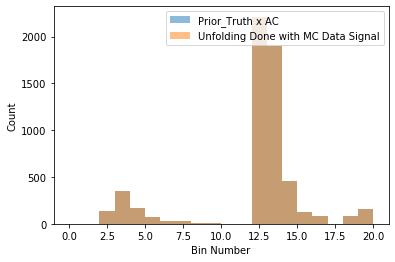

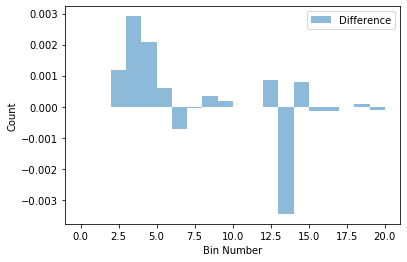

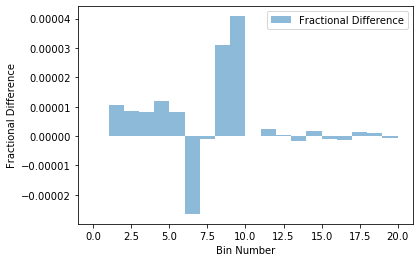

In [9]:
import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 21, 1)
count = np.arange(0.0, 20.0, 1)

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()

pyplot.hist(count, bins, weights=diff, alpha=0.5, label='Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.show()


pyplot.hist(count, bins, weights=diffasfrac, alpha=0.5, label='Fractional Difference')
pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Fractional Difference")
pyplot.show()

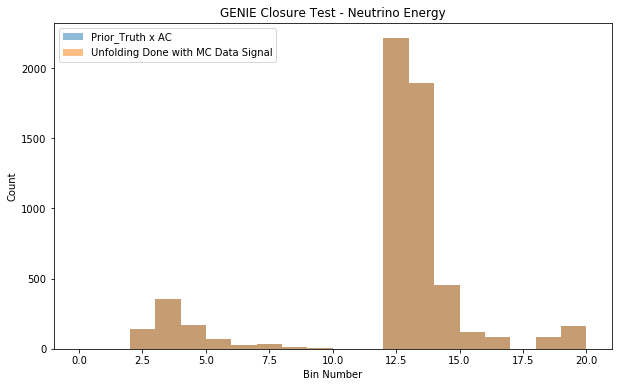

In [10]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=made_data_sig, alpha=0.5, label='Prior_Truth x AC')
pyplot.hist(count, bins, weights=events, alpha=0.5, label='Unfolding Done with MC Data Signal')
pyplot.legend(loc='upper left')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Count")
pyplot.title("GENIE Closure Test - Neutrino Energy")
pyplot.show()

fig.savefig("GENIE_closure_test_"+ending+".svg",bbox_inches='tight' )

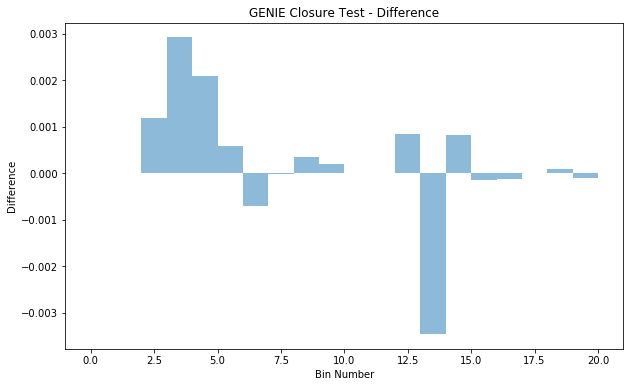

In [11]:
fig = plt.figure(figsize=(10, 6))

pyplot.hist(count, bins, weights=diff, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.xlabel("Bin Number")
pyplot.ylabel("Difference")
pyplot.title("GENIE Closure Test - Difference")
pyplot.show()

fig.savefig("GENIE_closure_test_diff_"+ending+".svg",bbox_inches='tight' )

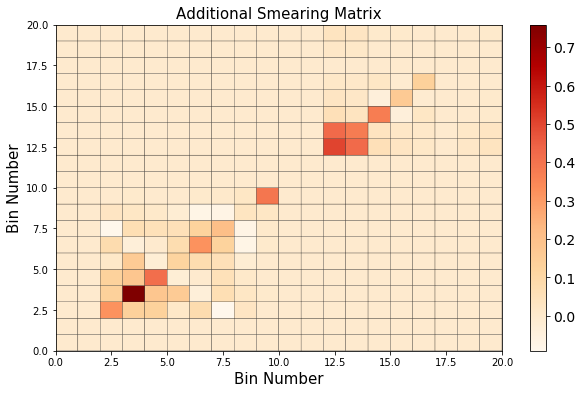

In [12]:
fig = plt.figure(figsize=(10, 6))  
    
plt.pcolor(bins, bins, chunks, cmap='OrRd', edgecolors='k')#, vmin=-1, vmax=1)
            
cbar = plt.colorbar()
cbar.ax.tick_params(labelsize=14)
#cbar.set_label(r"Log (Power)", size=15)

plt.xlabel('Bin Number', fontsize=15)
plt.ylabel('Bin Number', fontsize=15)

plt.title('Additional Smearing Matrix', fontsize=15)

plt.show()

fig.savefig("GENIE_closure_test_Ac_"+ending+".svg",bbox_inches='tight' )

## Need to convert to xsec units

xsec = unfolded event counts / (integrated flux * number of argon targets)

In [13]:
###################
### #N argon target calculation
###################

density = 1.3836  #g/cm^3
volume = (246-10)*(106-(-106))*(1026-10)         #cm^3
NA = 6.022E23   #atoms/mol
Nnuc = 40       #nucleans / atom
mmol = 39.95    #g/mol

Narg = (density * volume * NA * Nnuc)/mmol   #nucleons

print("number of argon targets = ", Narg)

number of argon targets =  4.240685683288815e+31


In [14]:
#Need R1 AND R3

####NUE
POT_R1 = 2.0E20 
int_flux_per_POT_R1 = 1.1864530596659353e-11
POT_R3 = 5.014E20
int_flux_per_POT_R3 = 8.628376225834778e-12

int_flux = (int_flux_per_POT_R1*POT_R1) + (int_flux_per_POT_R3*POT_R3)    #cm^-2

print("Nue integrated flux: ", int_flux)

####NUMU

POT_numu_R1 = 2.0E20 
int_flux_per_POT_numu_R1 = 5.455771063338641e-10
POT_numu_R3 = 5.014E20 
int_flux_per_POT_numu_R3 = 3.6729003479115414e-10

int_flux_numu = (int_flux_per_POT_numu_R1*POT_numu_R1) + (int_flux_per_POT_numu_R3*POT_numu_R3)    #cm^-2

print("Numu integrated flux: ", int_flux_numu)

Nue integrated flux:  6699173958.965427
Numu integrated flux:  293274644711.0575


In [15]:
nue_events = np.array(events[0:10])
numu_events = np.array(events[10:20])

nue_errs = np.array(errs[0:10])
numu_errs = np.array(errs[10:20])

In [16]:
#number of events

xsec_nue_events = nue_events / (int_flux * Narg )     
xsec_numu_events = numu_events / (int_flux_numu * Narg )     


#uncertainty

#xsec_nue_errs = nue_errs / (int_flux * Narg )     
#xsec_numu_errs = numu_errs / (int_flux_numu * Narg )     

In [17]:
#Need the four sections of the cov matrix

blockwise_errs = chunks_cov
#print(blockwise_errs)
#print("")

#MIX
top_left = blockwise_errs[:10]
for i in range(len(top_left)):
    top_left[i] = top_left[i][:10]
    
mix_errs_top = np.array(top_left)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_topmix_errs = (np.sqrt(np.diag(mix_errs_top)))
    
#NUMU ONLY    
top_right = blockwise_errs[:10]
for i in range(len(top_right)):
    top_right[i] = top_right[i][10:]
    
numu_errs_top = np.array(top_right)/((int_flux_numu*int_flux_numu)*(Narg*Narg))
xsec_numu_errs = np.nan_to_num(np.sqrt(np.diag(numu_errs_top)))

    
#NUE ONLY
bot_left = blockwise_errs[10:]
for i in range(len(bot_left)):
    bot_left[i] = bot_left[i][:10]
    
nue_errs_bot = np.array(bot_left)/((int_flux*int_flux)*(Narg*Narg))
xsec_nue_errs = np.nan_to_num(np.sqrt(np.diag(nue_errs_bot)))

#MIX
bot_right = blockwise_errs[10:]
for i in range(len(bot_right)):
    bot_right[i] = bot_right[i][10:]
    
mix_errs_bot = np.array(bot_right)/((int_flux*int_flux_numu)*(Narg*Narg))
xsec_botmix_errs = (np.sqrt(np.diag(mix_errs_bot)))


/tmp/ipykernel_12097/3991752781.py:21: RuntimeWarning: invalid value encountered in sqrt
  xsec_numu_errs = np.nan_to_num(np.sqrt(np.diag(numu_errs_top)))
/tmp/ipykernel_12097/3991752781.py:30: RuntimeWarning: invalid value encountered in sqrt
  xsec_nue_errs = np.nan_to_num(np.sqrt(np.diag(nue_errs_bot)))


In [18]:
### Calculate ratio uncertainties

xsec_ratio_events = np.nan_to_num(xsec_nue_events/xsec_numu_events)
print("Ratio event counts: ", xsec_ratio_events)
print("")

#####################

ratio_sq = (xsec_nue_events/xsec_numu_events)*(xsec_nue_events/xsec_numu_events)
print(ratio_sq)
print("")
nue_term = (xsec_nue_errs*xsec_nue_errs)/(xsec_nue_events*xsec_nue_events)
print(nue_term)
print("")
numu_term = (xsec_numu_errs*xsec_numu_errs)/(xsec_numu_events*xsec_numu_events)
print(numu_term)
print("")
mix_1 = (xsec_botmix_errs*xsec_botmix_errs)/(xsec_numu_events*xsec_nue_events)
mix_2 = (xsec_topmix_errs*xsec_topmix_errs)/(xsec_numu_events*xsec_nue_events)

ratio_var_errs = ratio_sq*(nue_term + numu_term - mix_1 - mix_2)
xsec_ratio_errs = np.nan_to_num(np.sqrt(abs(ratio_var_errs)))
print(xsec_ratio_errs)

Ratio event counts:  [ 0.00000000e+00 -1.49521190e+01  2.75645270e+00  8.15084211e+00
  1.66176490e+01  2.55491008e+01  1.34966062e+01 -1.43819400e+20
  5.48372472e+00  1.27740780e+00]

[           nan 2.23565864e+02 7.59803151e+00 6.64362271e+01
 2.76146257e+02 6.52756553e+02 1.82158380e+02 2.06840199e+40
 3.00712368e+01 1.63177070e+00]

[       nan 0.         0.18349047 0.05211169 0.02030824 0.02168116
 0.01429386 0.         0.09896115 0.20057548]

[       nan 0.         0.00072746 0.00180648 0.00292621 0.00738461
 0.0013586  0.         0.00155278 0.00017078]

[0.00000000e+00 9.98357828e+00 3.75357152e+00 6.58575856e+00
 1.00204778e+01 1.55231637e+01 1.02273315e+01 1.32599762e+29
 5.34276413e+00 2.61544965e+00]


/tmp/ipykernel_12097/3275008683.py:3: RuntimeWarning: invalid value encountered in true_divide
  xsec_ratio_events = np.nan_to_num(xsec_nue_events/xsec_numu_events)
/tmp/ipykernel_12097/3275008683.py:9: RuntimeWarning: invalid value encountered in true_divide
  ratio_sq = (xsec_nue_events/xsec_numu_events)*(xsec_nue_events/xsec_numu_events)
/tmp/ipykernel_12097/3275008683.py:12: RuntimeWarning: invalid value encountered in true_divide
  nue_term = (xsec_nue_errs*xsec_nue_errs)/(xsec_nue_events*xsec_nue_events)
/tmp/ipykernel_12097/3275008683.py:15: RuntimeWarning: invalid value encountered in true_divide
  numu_term = (xsec_numu_errs*xsec_numu_errs)/(xsec_numu_events*xsec_numu_events)
/tmp/ipykernel_12097/3275008683.py:18: RuntimeWarning: invalid value encountered in true_divide
  mix_1 = (xsec_botmix_errs*xsec_botmix_errs)/(xsec_numu_events*xsec_nue_events)
/tmp/ipykernel_12097/3275008683.py:19: RuntimeWarning: invalid value encountered in true_divide
  mix_2 = (xsec_topmix_errs*xsec_

In [19]:
print(xsec_nue_events)
print("")
print(xsec_numu_events)
print("")
print(xsec_nue_errs)
print("")
print(xsec_numu_errs)

[0.00000000e+00 6.60781436e-55 4.90276157e-40 1.24238047e-39
 6.06151036e-40 2.52287198e-40 9.46024634e-41 1.12606911e-40
 3.82215677e-41 1.67559391e-41]

[ 0.00000000e+00 -4.41931631e-56  1.77864890e-40  1.52423572e-40
  3.64763413e-41  9.87460185e-42  7.00935195e-42 -7.82974419e-61
  6.97000117e-42  1.31171416e-41]

[0.00000000e+00 0.00000000e+00 2.10013653e-40 2.83610441e-40
 8.63807564e-41 3.71480926e-41 1.13103794e-41 0.00000000e+00
 1.20237758e-41 7.50425690e-42]

[0.00000000e+00 0.00000000e+00 4.79727117e-42 6.47841782e-42
 1.97316653e-42 8.48561370e-43 2.58359189e-43 0.00000000e+00
 2.74655063e-43 1.71417214e-43]


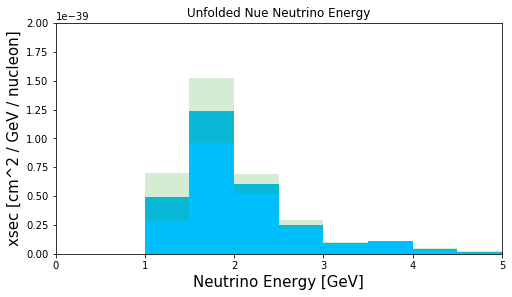

In [20]:
import random
import numpy
from matplotlib import pyplot
"""
bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
print(count)

plt.ylim(0, 5E-39)

plt.xlabel("Energy [GeV]")
plt.ylabel("xsec [cm^2]")

pyplot.hist(count, bins, weights=xsec_nue_events, alpha=0.5)
#pyplot.legend(loc='upper right')
pyplot.show()
"""

nue_fig = plt.figure(figsize=(8, 7))
nue_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
nue_ax1 = plt.subplot(nue_gs[0])
nue_ax1.set_xlim([0, 5])

bins = np.arange(0, 5.5, 0.5)
bincenters = np.arange(0.25, 5.25, 0.5)
bin_edges = np.arange(0, 5.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.1, 5.1, 0.5)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_nue_events[i]
    weights.append(weight)

sel = nue_ax1.hist(count, bins, color='deepskyblue', weights=xsec_nue_events)
plt.ylim(0, 2E-39)
nue_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
nue_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
nue_ax1.set_title("Unfolded Nue Neutrino Energy")

lower_err = np.nan_to_num(xsec_nue_events-xsec_nue_errs)

nue_ax1.bar(bincenters, xsec_nue_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

nue_fig.savefig("unfolded_MC_nue_"+ending+".svg",bbox_inches='tight' )

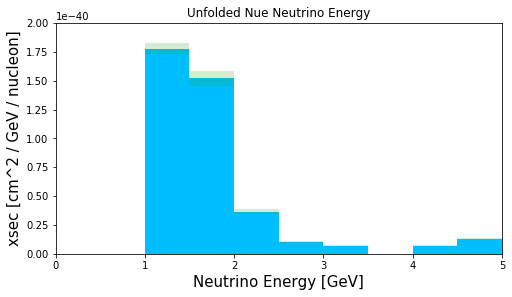

In [21]:
import random
import numpy
from matplotlib import pyplot

numu_fig = plt.figure(figsize=(8, 7))
numu_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
numu_ax1 = plt.subplot(numu_gs[0])
numu_ax1.set_xlim([0, 5])

bins = np.arange(0, 5.5, 0.5)
bincenters = np.arange(0.25, 5.25, 0.5)
bin_edges = np.arange(0, 5.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]
count = np.arange(0.1, 5.1, 0.5)
weights = []
for i in range(len(count)):
    weight = count[i]*xsec_numu_events[i]
    weights.append(weight)

sel = numu_ax1.hist(count, bins, color='deepskyblue', weights=xsec_numu_events)
plt.ylim(0, 2E-40)
numu_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
numu_ax1.set_ylabel('xsec [cm^2 / GeV / nucleon]', fontsize=15)
numu_ax1.set_title("Unfolded Nue Neutrino Energy")

lower_err = np.nan_to_num(xsec_numu_events-xsec_numu_errs)

numu_ax1.bar(bincenters, xsec_numu_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

numu_fig.savefig("unfolded_MC_numu_"+ending+".svg",bbox_inches='tight' )

[            nan -1.49521190e+01  2.75645270e+00  8.15084211e+00
  1.66176490e+01  2.55491008e+01  1.34966062e+01 -1.43819400e+20
  5.48372472e+00  1.27740780e+00]
[ 0.00000000e+00 -1.49521190e+01  2.75645270e+00  8.15084211e+00
  1.66176490e+01  2.55491008e+01  1.34966062e+01 -1.43819400e+20
  5.48372472e+00  1.27740780e+00]


/tmp/ipykernel_12097/3626634403.py:15: RuntimeWarning: invalid value encountered in true_divide
  print(xsec_nue_events/xsec_numu_events)
/tmp/ipykernel_12097/3626634403.py:18: RuntimeWarning: invalid value encountered in true_divide
  pyplot.hist(count, bins, weights=np.nan_to_num(xsec_nue_events/xsec_numu_events), alpha=0.5)


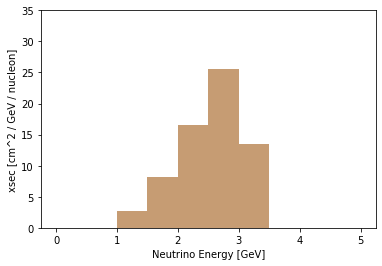

In [22]:
#Think need to replace 2nd bin due to unfolding

import random
import numpy
from matplotlib import pyplot

bins = np.arange(0, 5.5, 0.5)
count = np.arange(0.1, 5.1, 0.5)
#print(count)

plt.ylim(0, 35)
plt.xlabel("Neutrino Energy [GeV]")
plt.ylabel("xsec [cm^2 / GeV / nucleon]")

print(xsec_nue_events/xsec_numu_events)
print(xsec_ratio_events)

pyplot.hist(count, bins, weights=np.nan_to_num(xsec_nue_events/xsec_numu_events), alpha=0.5)
pyplot.hist(count, bins, weights=xsec_ratio_events, alpha=0.5)

#pyplot.legend(loc='upper right')
pyplot.show()

[0.1 0.6 1.1 1.6 2.1 2.6 3.1 3.6 4.1 4.6]
[  0.         -14.95211904   2.7564527    8.15084211  16.61764896
  25.54910083  13.49660625   0.           5.48372472   1.2774078 ]

[  0.         -14.95211904   2.7564527    8.15084211  16.61764896
  25.54910083  13.49660625   0.           5.48372472   1.2774078 ]


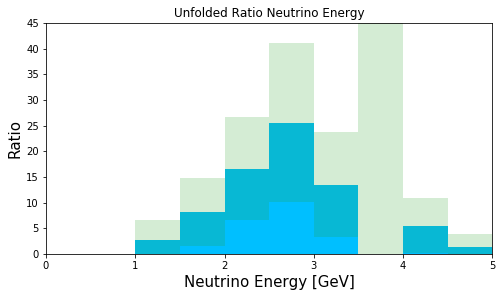

In [23]:
import random
import numpy
from matplotlib import pyplot


ratio_fig = plt.figure(figsize=(8, 7))
ratio_gs = gridspec.GridSpec(2, 1, height_ratios=[2, 1])
ratio_ax1 = plt.subplot(ratio_gs[0])
ratio_ax1.set_xlim([0, 5])

bins = np.arange(0, 5.5, 0.5)
bincenters = np.arange(0.25, 5.25, 0.5)
bin_edges = np.arange(0, 5.5, 0.5)
bin_size = [(bin_edges[i + 1] - bin_edges[i]) / 2
            for i in range(len(bin_edges) - 1)]

count = np.arange(0.1, 5.1, 0.5)
#print(len(count))
#weights = []
#for i in range(len(count)):
#    weight = count[i]*xsec_ratio_events[i]
#    weights.append(weight)
test_weights = [(random.random()/random.random() - 0.75) for x in range(len(count))]
print(count)
xsec_ratio_events[7] = 0
print(xsec_ratio_events)
print("")
sel = ratio_ax1.hist(count, bins, color='deepskyblue', weights=xsec_ratio_events)  # , weights=xsec_ratio_events
print(sel[0])

plt.ylim(0, 45)
ratio_ax1.set_xlabel('Neutrino Energy [GeV]', fontsize=15)
ratio_ax1.set_ylabel('Ratio', fontsize=15)
ratio_ax1.set_title("Unfolded Ratio Neutrino Energy")

lower_err = np.nan_to_num(xsec_ratio_events-xsec_ratio_errs)

ratio_ax1.bar(bincenters, xsec_ratio_errs*2,width=[n*2 for n in bin_size],facecolor='tab:green',alpha=0.2,bottom=(lower_err))

ratio_fig.savefig("unfolded_MC_ratio_"+ending+".svg",bbox_inches='tight' )